In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pingouin as pg
import seaborn as sns
plt.style.use('ggplot')

In [201]:
overall_data = pd.read_excel('Desktop/HEALTH DATA Adopted.xlsx')

In [202]:
overall_data.describe()

,"Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000",Poor Health,Poor Mental Health,Trouble Paying Off Medical Bills,2018__Uninsured
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,160.216129,149.696774,0.175871,0.230574,0.271387,0.066968
std,27.272063,14.325862,0.034359,0.024872,0.061048,0.021851
min,119.000000,123.500000,0.134000,0.189000,0.149000,0.027210
25%,138.050000,141.000000,0.146000,0.214850,0.237500,0.053172
50%,159.100000,146.500000,0.170000,0.224400,0.265000,0.064757
75%,178.400000,158.000000,0.192500,0.249300,0.321500,0.078205
max,217.400000,181.600000,0.263000,0.290900,0.390000,0.120369


p-val is the p-value of the test. (p <.05 - columns are correlated) The general rule is that you can reject the hypothesis that the two variables are not correlated if the p-value is below 0.05.

In [203]:
pg.pairwise_corr(overall_data).sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']]

,X,Y,n,r,p-unc
0,"Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000",31,0.785102,1.699069e-07
9,Poor Health,Poor Mental Health,31,0.774742,3.127910e-07
7,"Cancer Death Rate per 100,000",Trouble Paying Off Medical Bills,31,0.754001,9.693993e-07
6,"Cancer Death Rate per 100,000",Poor Mental Health,31,0.720563,4.847309e-06
1,"Heart Disease Death Rate per 100,000",Poor Health,31,0.715539,6.053345e-06
12,Poor Mental Health,Trouble Paying Off Medical Bills,31,0.656561,6.041041e-05
3,"Heart Disease Death Rate per 100,000",Trouble Paying Off Medical Bills,31,0.634857,1.249315e-04
5,"Cancer Death Rate per 100,000",Poor Health,31,0.620829,1.941714e-04
2,"Heart Disease Death Rate per 100,000",Poor Mental Health,31,0.614495,2.353446e-04
10,Poor Health,Trouble Paying Off Medical Bills,31,0.512053,3.232340e-03


In [204]:
overall_data.corr().round(2)

,"Heart Disease Death Rate per 100,000","Cancer Death Rate per 100,000",Poor Health,Poor Mental Health,Trouble Paying Off Medical Bills,2018__Uninsured
"Heart Disease Death Rate per 100,000",1.00,0.79,0.72,0.61,0.63,0.11
"Cancer Death Rate per 100,000",0.79,1.00,0.62,0.72,0.75,-0.09
Poor Health,0.72,0.62,1.00,0.77,0.51,0.32
Poor Mental Health,0.61,0.72,0.77,1.00,0.66,0.13
Trouble Paying Off Medical Bills,0.63,0.75,0.51,0.66,1.00,0.28
2018__Uninsured,0.11,-0.09,0.32,0.13,0.28,1.00


Text(0.5, 1, 'Correlation Heatmap Matrix')

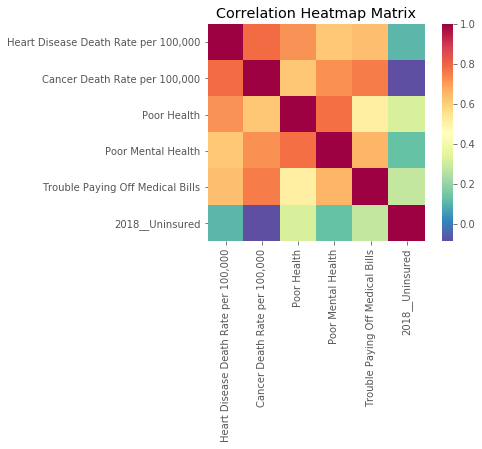

In [205]:
corrs = overall_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', square=True)
plt.title('Correlation Heatmap Matrix')

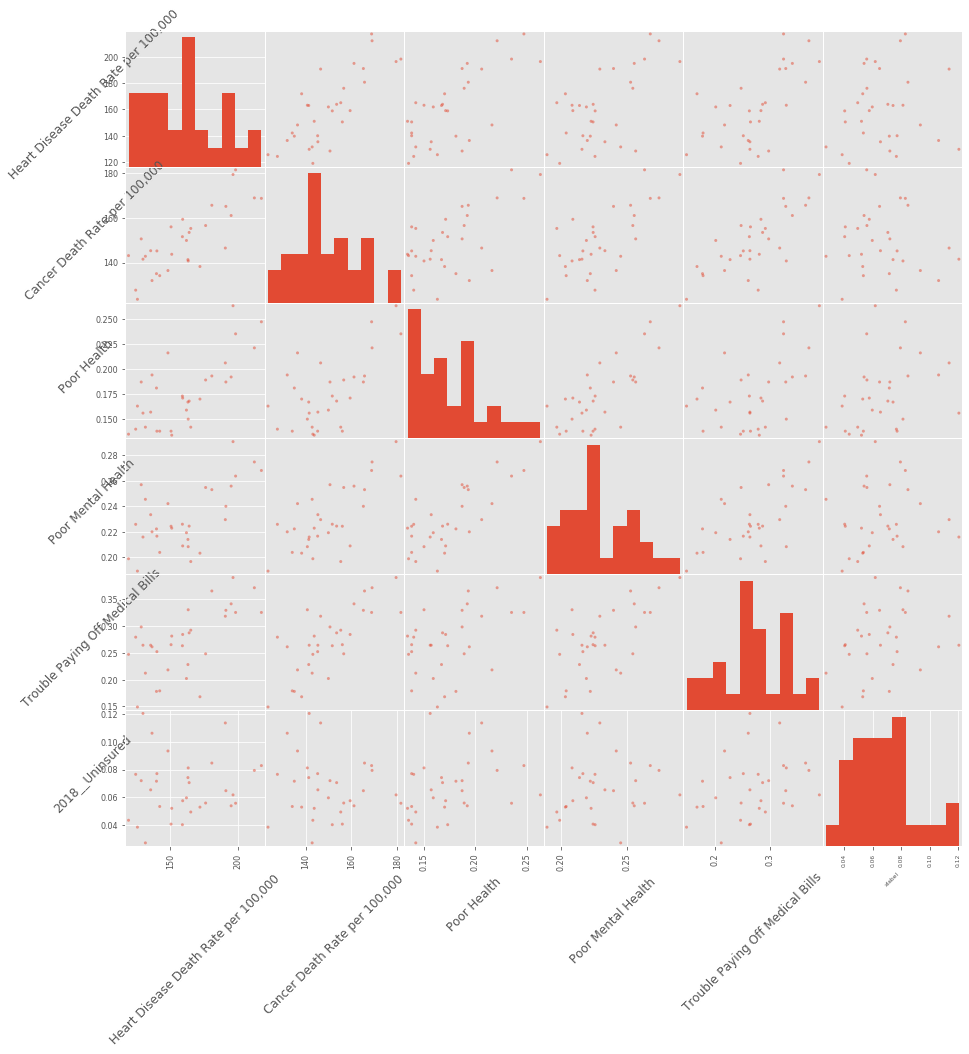

In [206]:
sm = pd.plotting.scatter_matrix(overall_data, figsize=(15, 15))
plt.xlabel('xlabel', fontsize=6)
plt.ylabel('ylabel', fontsize=6)
ax.tick_params(axis = 'both', which = 'major', labelsize = 6)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
plt.tick_params(labelsize=6)
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]

plt.show()